# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [119]:
#!pip install -q transformers

In [120]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [121]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
aircraft = []
traveller_type = []
seat_type = []
route = []
date_flown = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    for i in parsed_content.find_all("div",{"class":"review-stats"}):
        for table in i.find_all("table",{"class":"review-ratings"}):            
            for row in table.find_all("tr"):
                if row.find("td",{"class":"review-rating-header aircraft"}):
                    aircraft.append(row.find("td",{"class":"review-value"}).get_text())
                    continue
                if row.find("td",{"class":"review-rating-header type_of_traveller"}):
                    traveller_type.append(row.find("td",{"class":"review-value"}).get_text())
                    continue
                if row.find("td",{"class":"review-rating-header cabin_flown"}):
                    seat_type.append(row.find("td",{"class":"review-value"}).get_text())
                    continue
                if row.find("td",{"class":"review-rating-header route"}):
                    route.append(row.find("td",{"class":"review-value"}).get_text())
                    continue
                if row.find("td",{"class":"review-rating-header date_flown"}):
                    date_flown.append(row.find("td",{"class":"review-value"}).get_text())
            if not table.find("td",{"class":"review-rating-header aircraft"}):   
                aircraft.append(None)
            if not table.find("td",{"class":"review-rating-header type_of_traveller"}):   
                traveller_type.append(None)
            if not table.find("td",{"class":"review-rating-header cabin_flown"}):   
                seat_type.append(None)
            if not table.find("td",{"class":"review-rating-header route"}):   
                route.append(None)
            if not table.find("td",{"class":"review-rating-header date_flown"}):   
                date_flown.append(None)
                
                    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [122]:
#print(parsed_content.prettify())

In [123]:
df = pd.DataFrame()
df["reviews"] = reviews
df["aircraft"] = aircraft
df["date_flown"] = date_flown
df["traveller_type"] = traveller_type
df["route"] = route
df["seat_type"] = seat_type
df.head()

,reviews,aircraft,date_flown,traveller_type,route,seat_type
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class


In [124]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         1000 non-null   object
 1   aircraft        533 non-null    object
 2   date_flown      1000 non-null   object
 3   traveller_type  998 non-null    object
 4   route           997 non-null    object
 5   seat_type       1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [126]:
#pd.to_datetime(df["date_flown"]).dt.month

In [127]:
df['aircraft'].nunique()

81

In [128]:
sorted(df["date_flown"].unique())

['April 2019',
 'April 2020',
 'April 2021',
 'April 2022',
 'April 2023',
 'April 2024',
 'August 2019',
 'August 2020',
 'August 2021',
 'August 2022',
 'August 2023',
 'December 2018',
 'December 2019',
 'December 2020',
 'December 2021',
 'December 2022',
 'December 2023',
 'February 2019',
 'February 2020',
 'February 2021',
 'February 2022',
 'February 2023',
 'February 2024',
 'January 2019',
 'January 2020',
 'January 2021',
 'January 2022',
 'January 2023',
 'January 2024',
 'July 2019',
 'July 2020',
 'July 2021',
 'July 2022',
 'July 2023',
 'June 2019',
 'June 2020',
 'June 2021',
 'June 2022',
 'June 2023',
 'March 2019',
 'March 2020',
 'March 2022',
 'March 2023',
 'March 2024',
 'May 2019',
 'May 2020',
 'May 2021',
 'May 2022',
 'May 2023',
 'November 2018',
 'November 2019',
 'November 2020',
 'November 2021',
 'November 2022',
 'November 2023',
 'October 2018',
 'October 2019',
 'October 2020',
 'October 2021',
 'October 2022',
 'October 2023',
 'September 2018',
 'S

In [129]:
df["seat_type"].unique()

array(['Economy Class', 'Premium Economy', 'Business Class',
       'First Class'], dtype=object)

In [130]:
df["traveller_type"].unique()

array(['Solo Leisure', 'Business', 'Couple Leisure', 'Family Leisure',
       None], dtype=object)

# **TEXT PRE-PROCESSING**

In [131]:
#Create the vocabulary & the counter for the reviews 
from collections import Counter
reviews = [i.replace("✅ Trip Verified |","").strip().lower() for i in df.reviews]
print (reviews[:2])
print("\n")

concat_str = ' '.join([str(text).strip('\n') for text in reviews]) 
print(concat_str[:500])
print("\n")

vocabulary= concat_str.split(' ')
print(vocabulary[:50])
print("\n")
print("vocabulary length: "+ str(len(set(vocabulary))))
val_count=Counter(vocabulary)
#val_count

["i flew with british airways from heathrow to hannover. although the check-in process was relatively quick, there was a noticeable lack of staff—another apparent cost-cutting measure by ba. upon arriving in hannover, i found that my luggage hadn't made it to the airport, and there were no staff to assist. i had to file a report online. the following day, i received a call saying my luggage would arrive on a later flight, but this didn't help me since german shops are closed on sundays, leaving me without essential items. as a result, i was confined to my hotel, unable to attend any planned events because i didn't have suitable clothing. when my luggage eventually reached the hannover airport, i got a call from ba informing me that they couldn't deliver it for another day or two. they advised me to take a taxi to pick it up and said i could claim back the cost, but when i submitted my claim, ba refused to cover the taxi expenses. they also declined to offer compensation for the inconve

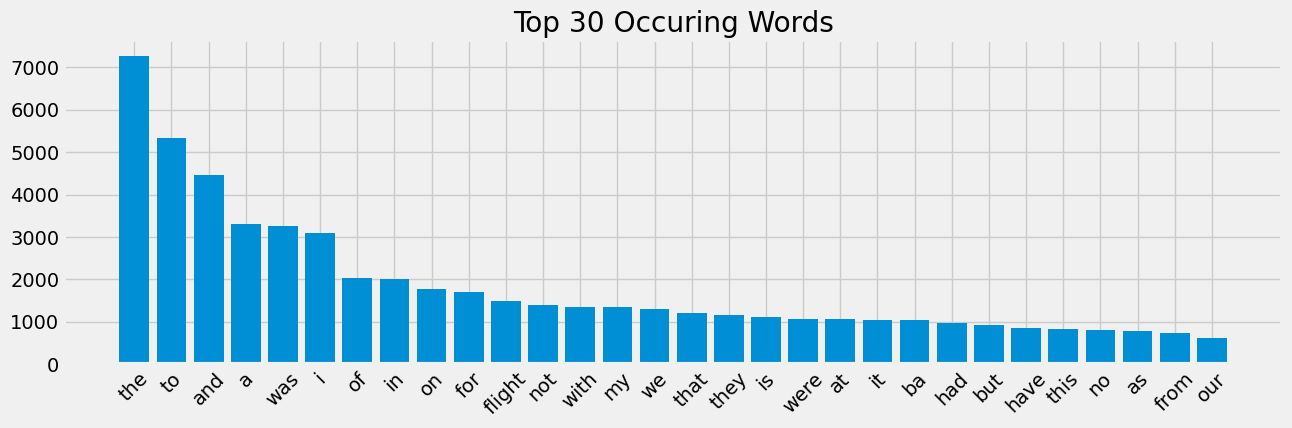

In [132]:
#Visualise the top 30 occuring words in the reviews
from matplotlib import pyplot as plt
def plot_top_words(word_counter):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(14,4))
    plt.xticks(rotation=45)
    plt.bar(*zip(*word_counter))
    plt.title("Top 30 Occuring Words")
    plt.show()

plot_top_words(val_count.most_common(30))

In [133]:
from nltk.corpus import stopwords

In [134]:
# Removing negation from nltk stopwords list
# Adding common words to nltk stopwords list
#not_stopwords = {'no','not','never'}
new_stopwords = {'ba','airline','airlines','airways','ba.',"ba's",'flight','would','should','could','flights'}
updated_stopwords = set([word for word in set(stopwords.words('english')).union(new_stopwords)])

In [135]:
vocab = [word.strip("\",.\'") for word in vocabulary if word not in updated_stopwords]
print(vocab[:100])

['flew', 'british', 'heathrow', 'hannover', 'although', 'check-in', 'process', 'relatively', 'quick', 'noticeable', 'lack', 'staff—another', 'apparent', 'cost-cutting', 'measure', 'upon', 'arriving', 'hannover', 'found', 'luggage', 'made', 'airport', 'staff', 'assist', 'file', 'report', 'online', 'following', 'day', 'received', 'call', 'saying', 'luggage', 'arrive', 'later', 'flight', 'help', 'since', 'german', 'shops', 'closed', 'sundays', 'leaving', 'without', 'essential', 'items', 'result', 'confined', 'hotel', 'unable', 'attend', 'planned', 'events', 'suitable', 'clothing', 'luggage', 'eventually', 'reached', 'hannover', 'airport', 'got', 'call', 'informing', 'deliver', 'another', 'day', 'two', 'advised', 'take', 'taxi', 'pick', 'said', 'claim', 'back', 'cost', 'submitted', 'claim', 'refused', 'cover', 'taxi', 'expenses', 'also', 'declined', 'offer', 'compensation', 'inconvenience', 'caused', 'delayed', 'baggage', 'even', 'though', 'disrupted', 'full', 'day', 'trip', 'service', 're

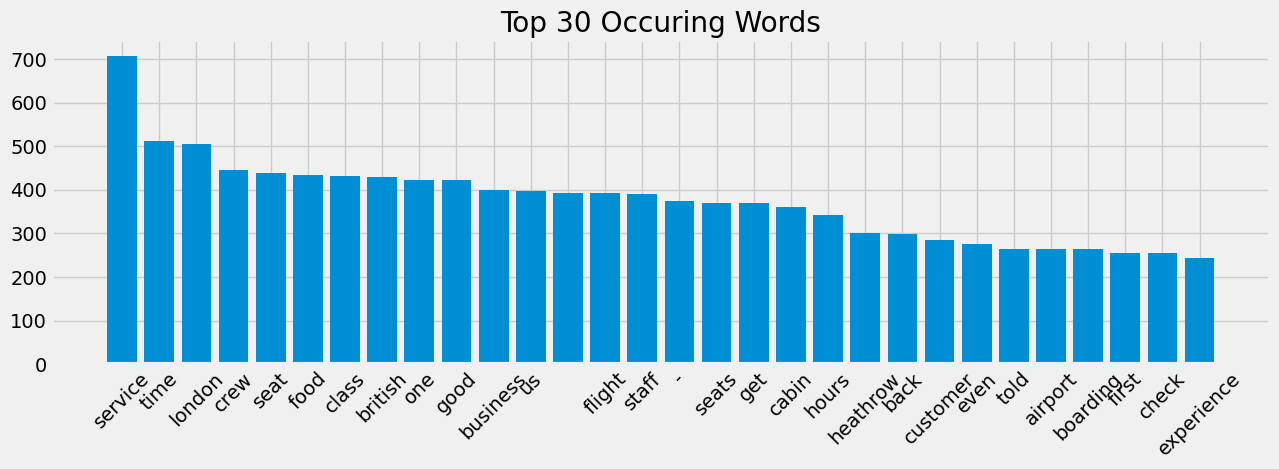

In [136]:
#Visualise the top 30 occuring words in the reviews
from matplotlib import pyplot as plt
def plot_top_words(word_counter):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(14,4))
    plt.xticks(rotation=45)
    plt.bar(*zip(*word_counter))
    plt.title("Top 30 Occuring Words")
    plt.show()

plot_top_words(Counter(vocab).most_common(30))

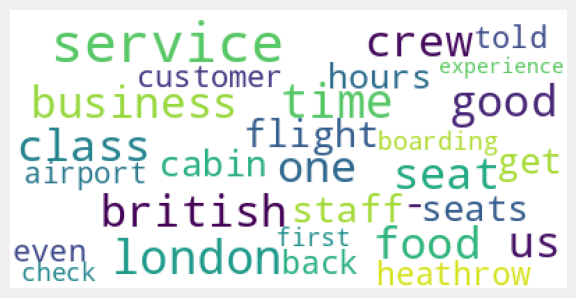

In [137]:
#Visualise the top 30 occuring words in the reviews
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=30,
                          max_font_size=40,
                          random_state=42
                         ).generate_from_frequencies(Counter(vocab))

plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# **TOPIC MODELLING**

In [138]:
vect = TfidfVectorizer(stop_words=list(updated_stopwords))
X = vect.fit_transform(reviews)

pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,00,000,0038,00am,00pm,01,0103,0120,0200,0289,...,zip,zone,zones,zoo,zrh,zuletzt,zum,zurich,zusammenschluss,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
N_TOPICS = 15
nmf = NMF(n_components=N_TOPICS)
W = nmf.fit_transform(X)  # Document-topic matrix
H = nmf.components_ 

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [140]:
# Top 15 words per topic

words = np.array(vect.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((N_TOPICS, 15)), index=[f'Topic {i + 1}' for i in range(N_TOPICS)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(N_TOPICS):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,good,lounge,club,food,excellent,time,world,new,arrival,quick,fine,overall,well,efficient,drinks
Topic 2,us,hotel,told,day,next,airport,get,missed,help,home,got,one,tickets,booked,connecting
Topic 3,class,business,first,british,middle,rows,one,seating,even,economy,service,lounge,way,heathrow,seat
Topic 4,voucher,refund,cancelled,travel,booked,cancel,money,months,due,rebook,return,british,received,2020,paid
Topic 5,economy,premium,seats,leg,comfortable,better,passengers,room,back,upgrade,flying,attendants,friendly,extra,professional
Topic 6,delayed,hours,worst,london,connecting,missed,amsterdam,experience,heathrow,arrived,time,baggage,delay,airport,ever
Topic 7,customer,service,call,british,phone,number,never,tried,change,booking,website,get,email,help,ticket
Topic 8,crew,great,cabin,friendly,best,thank,excellent,comfortable,really,professional,nice,amazing,service,attentive,heathrow
Topic 9,food,entertainment,inflight,haul,small,hour,uncomfortable,plane,long,water,old,poor,pretty,system,selection
Topic 10,check,boarding,gate,minutes,plane,late,passengers,hour,queue,time,security,airport,wait,took,15


In [199]:
# Create a topic mapping

topic_mapping = {
    'Topic 8': 'Staff',
    'Topic 15': 'Food & Beverages',
    'Topic 1': 'Food & Beverages',
    'Topic 10': 'Boarding',
    'Topic 12': 'Seating',
    'Topic 13': 'Luggage handling',
    'Topic 4': 'Cancellation & Refund',
    'Topic 14': 'Staff',
    'Topic 11': 'Luggage handling',
    }
    

In [200]:
W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(N_TOPICS)])
W['max_topic'] = W.apply(lambda x: topic_mapping.get(x.idxmax()), axis=1)
W[pd.notnull(W['max_topic'])].head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,max_topic
0,0.000000,0.038602,0.000000,0.011392,0.014945,0.041652,0.067094,0.007912,0.000000,0.014226,0.108419,0.000000,0.021308,0.082598,0.002689,Luggage handling
1,0.026482,0.000000,0.000000,0.000000,0.000000,0.040136,0.000000,0.000004,0.031965,0.057971,0.062185,0.011299,0.000000,0.009762,0.016012,Luggage handling
4,0.000000,0.000000,0.005155,0.013023,0.003327,0.000000,0.031581,0.041551,0.000000,0.019131,0.002249,0.008328,0.032101,0.099287,0.021414,Staff
5,0.000000,0.008088,0.000163,0.000000,0.000000,0.030303,0.000000,0.000000,0.030229,0.003102,0.090131,0.000000,0.025168,0.000000,0.000000,Luggage handling
8,0.000000,0.004866,0.000000,0.071238,0.000000,0.000000,0.069668,0.000000,0.039661,0.032932,0.007929,0.008862,0.000000,0.000000,0.000000,Cancellation & Refund
9,0.000152,0.033371,0.000000,0.125177,0.002590,0.022477,0.083052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cancellation & Refund
11,0.042846,0.000000,0.000000,0.000000,0.003432,0.000000,0.000000,0.003228,0.000000,0.013337,0.000000,0.072000,0.001329,0.000000,0.053948,Seating
13,0.016123,0.000000,0.091787,0.000000,0.000000,0.000000,0.005131,0.111123,0.004372,0.000000,0.000000,0.000000,0.000000,0.000648,0.074977,Staff
14,0.074451,0.000000,0.027008,0.000000,0.000007,0.000000,0.000000,0.055053,0.040259,0.022618,0.000000,0.028774,0.000000,0.000000,0.148021,Food & Beverages
15,0.000000,0.019946,0.006681,0.076795,0.003213,0.008452,0.019957,0.029655,0.041037,0.029082,0.000000,0.000000,0.015836,0.016259,0.020563,Cancellation & Refund


In [201]:
df['context'] = W['max_topic']

In [202]:
df.head(10)

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01
5,"✅ Trip Verified | Absolutely terrible, lost m...",A350,April 2024,Solo Leisure,Austin to London Heathrow,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
6,✅ Trip Verified | We booked premium economy r...,None,February 2024,Couple Leisure,Zurich to Phoenix via Heathrow,Premium Economy,None,Positive,2,2024,2024-02-01
7,✅ Trip Verified | We chose Rotterdam and Lond...,A319 / E190,March 2024,Couple Leisure,Rotterdam to London City,Economy Class,None,Positive,3,2024,2024-03-01
8,✅ Trip Verified | The entire booking and ticke...,None,April 2024,Solo Leisure,Kansas City to Dublin via Heathrow,Premium Economy,Cancellation & Refund,Positive,4,2024,2024-04-01
9,Not Verified | British Airways cancelled my ...,None,January 2024,Family Leisure,Tenerife to London,Economy Class,Cancellation & Refund,Negative,1,2024,2024-01-01


# **SENTIMENT ANALYSIS**

In [145]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig

In [146]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [147]:
reviews_encoded = tokenizer.batch_encode_plus(reviews,padding=True, 
                                              truncation=True,
                                              max_length = 512,
                                              return_tensors='tf')

In [148]:
reviews_encoded.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [149]:
k = 0
print('Training Comments -->>',reviews[k])
print('\nInput Ids -->>\n',reviews_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(reviews_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',reviews_encoded['attention_mask'][k])

Training Comments -->> i flew with british airways from heathrow to hannover. although the check-in process was relatively quick, there was a noticeable lack of staff—another apparent cost-cutting measure by ba. upon arriving in hannover, i found that my luggage hadn't made it to the airport, and there were no staff to assist. i had to file a report online. the following day, i received a call saying my luggage would arrive on a later flight, but this didn't help me since german shops are closed on sundays, leaving me without essential items. as a result, i was confined to my hotel, unable to attend any planned events because i didn't have suitable clothing. when my luggage eventually reached the hannover airport, i got a call from ba informing me that they couldn't deliver it for another day or two. they advised me to take a taxi to pick it up and said i could claim back the cost, but when i submitted my claim, ba refused to cover the taxi expenses. they also declined to offer compens

In [150]:
#def softmax(x):
    #return(np.exp(x)/np.exp(x).sum())

In [151]:
pred = model.predict(
    [reviews_encoded['input_ids'], reviews_encoded['token_type_ids'], reviews_encoded['attention_mask']])
 
# pred is of type TFSequenceClassifierOutput
logits = pred.logits
print(logits[:10]) 

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)
print(pred_labels[:10]) 
# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

 
label = {1: 'Positive',0:'Negative'}
 
# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]

 
print('Predicted Label :', pred_labels[:10])


32/32 [==============================] - 33s 656ms/step
[[ 0.05363339 -0.3020857 ]
 [-0.26968905 -0.13132408]
 [ 0.22812042 -0.10058612]
 [ 0.00373007 -0.17329046]
 [-0.3934964  -0.04688551]
 [-0.16257487 -0.18336901]
 [-0.4448704   0.03215579]
 [-0.5043298  -0.07885453]
 [-0.23907602 -0.16019115]
 [ 0.46001136 -0.00615165]]
tf.Tensor([0 1 0 0 1 0 1 1 1 0], shape=(10,), dtype=int64)
Predicted Label : ['Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative']


In [152]:
df['sentiment'] = pred_labels

In [203]:
df.head(10)

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01
5,"✅ Trip Verified | Absolutely terrible, lost m...",A350,April 2024,Solo Leisure,Austin to London Heathrow,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
6,✅ Trip Verified | We booked premium economy r...,None,February 2024,Couple Leisure,Zurich to Phoenix via Heathrow,Premium Economy,None,Positive,2,2024,2024-02-01
7,✅ Trip Verified | We chose Rotterdam and Lond...,A319 / E190,March 2024,Couple Leisure,Rotterdam to London City,Economy Class,None,Positive,3,2024,2024-03-01
8,✅ Trip Verified | The entire booking and ticke...,None,April 2024,Solo Leisure,Kansas City to Dublin via Heathrow,Premium Economy,Cancellation & Refund,Positive,4,2024,2024-04-01
9,Not Verified | British Airways cancelled my ...,None,January 2024,Family Leisure,Tenerife to London,Economy Class,Cancellation & Refund,Negative,1,2024,2024-01-01


In [204]:
df.to_csv('final_ba_reviews.csv')

<Axes: xlabel='context,sentiment'>

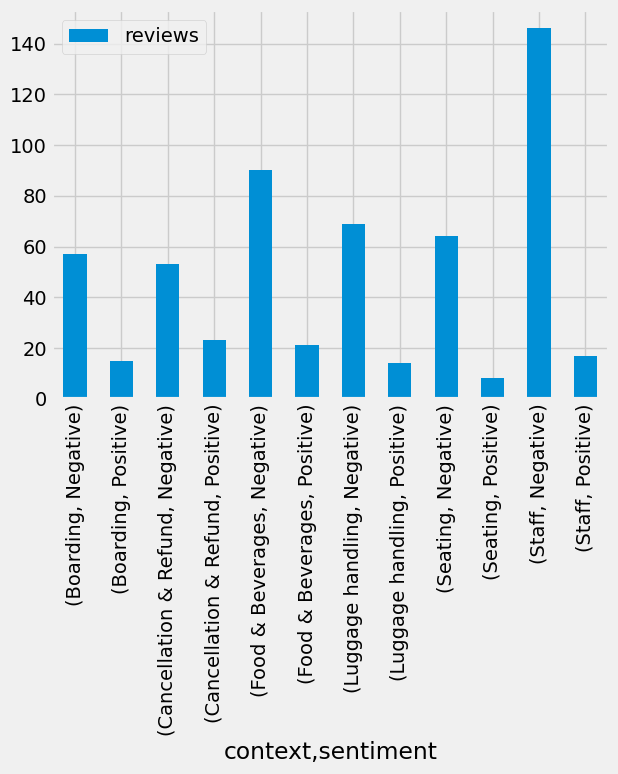

In [205]:
df1 = df[['reviews', 'context', 'sentiment']]
topic_count=df1.groupby(['context','sentiment']).count()
topic_count.plot(kind='bar')

<Axes: title={'center': 'most common sentiment'}, ylabel='count'>

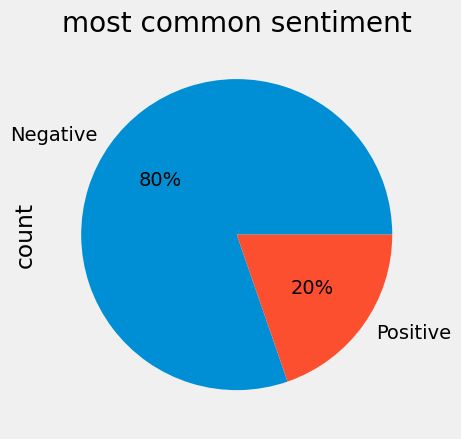

In [206]:
df.sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%',title='most common sentiment')

<Axes: title={'center': 'most discussed topic'}, ylabel='count'>

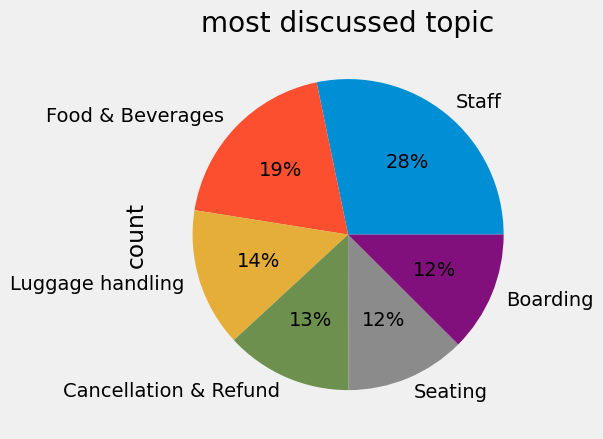

In [207]:
df.context.value_counts().plot(kind='pie',autopct='%1.0f%%',title='most discussed topic')

<Axes: title={'center': 'Cancellation & Refund reviews'}, ylabel='count'>

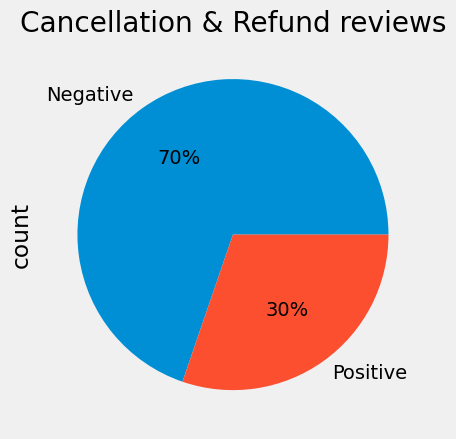

In [208]:
df2=df[df.context == 'Cancellation & Refund']
df2.sentiment.value_counts().plot(kind='pie',title='Cancellation & Refund reviews',autopct='%1.0f%%')

<Axes: title={'center': 'Food & Beverages reviews'}, ylabel='count'>

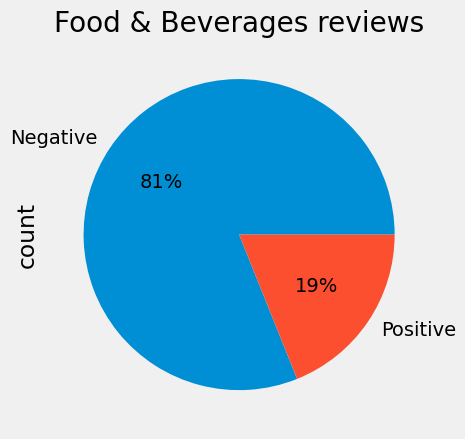

In [209]:
df3=df[df.context == 'Food & Beverages']
df3.sentiment.value_counts().plot(kind='pie',title='Food & Beverages reviews',autopct='%1.0f%%')

<Axes: title={'center': 'Seating reviews'}, ylabel='count'>

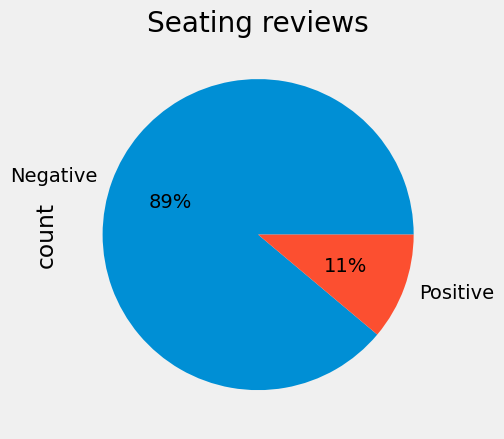

In [210]:
df4=df[df.context == 'Seating']
df4.sentiment.value_counts().plot(kind='pie',title='Seating reviews',autopct='%1.0f%%')

<Axes: title={'center': 'Luggage handling reviews'}, ylabel='count'>

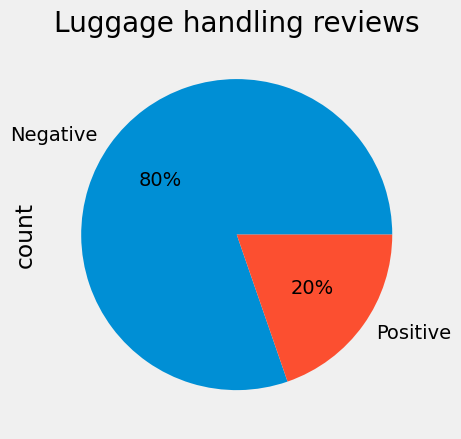

In [239]:
df6=df[df.context == 'Luggage handling']
df.sentiment.value_counts().plot(kind='pie',title='Luggage handling reviews',autopct='%1.0f%%')

<Axes: title={'center': 'Boarding reviews'}, ylabel='count'>

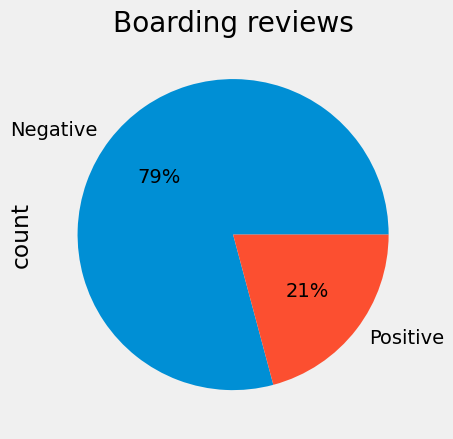

In [212]:
df7=df[df.context == 'Boarding']
df7.sentiment.value_counts().plot(kind='pie',title='Boarding reviews',autopct='%1.0f%%')

<Axes: title={'center': 'Flight delays reviews'}, ylabel='count'>

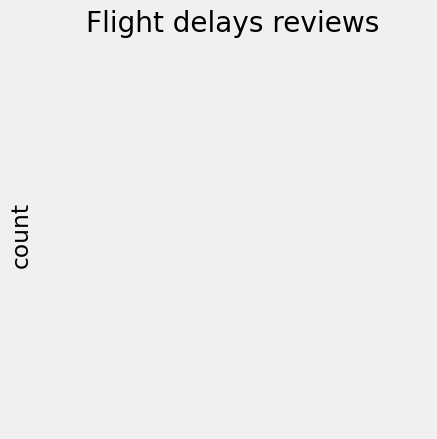

In [213]:
df8=df[df.context == 'Flight delays']
df8.sentiment.value_counts().plot(kind='pie',title='Flight delays reviews',autopct='%1.0f%%')

In [214]:
df['month_flown'] = pd.to_datetime(df.date_flown).dt.month

/tmp/ipykernel_34/2532657369.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_flown'] = pd.to_datetime(df.date_flown).dt.month


In [215]:
df['year_flown'] = pd.to_datetime(df.date_flown).dt.year

/tmp/ipykernel_34/1598902162.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year_flown'] = pd.to_datetime(df.date_flown).dt.year


In [216]:
df.head()

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01


In [217]:
df['modified_date_flown'] = pd.to_datetime(df.date_flown)

/tmp/ipykernel_34/154951709.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['modified_date_flown'] = pd.to_datetime(df.date_flown)


In [218]:
df.head()

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01


<Axes: xlabel='modified_date_flown'>

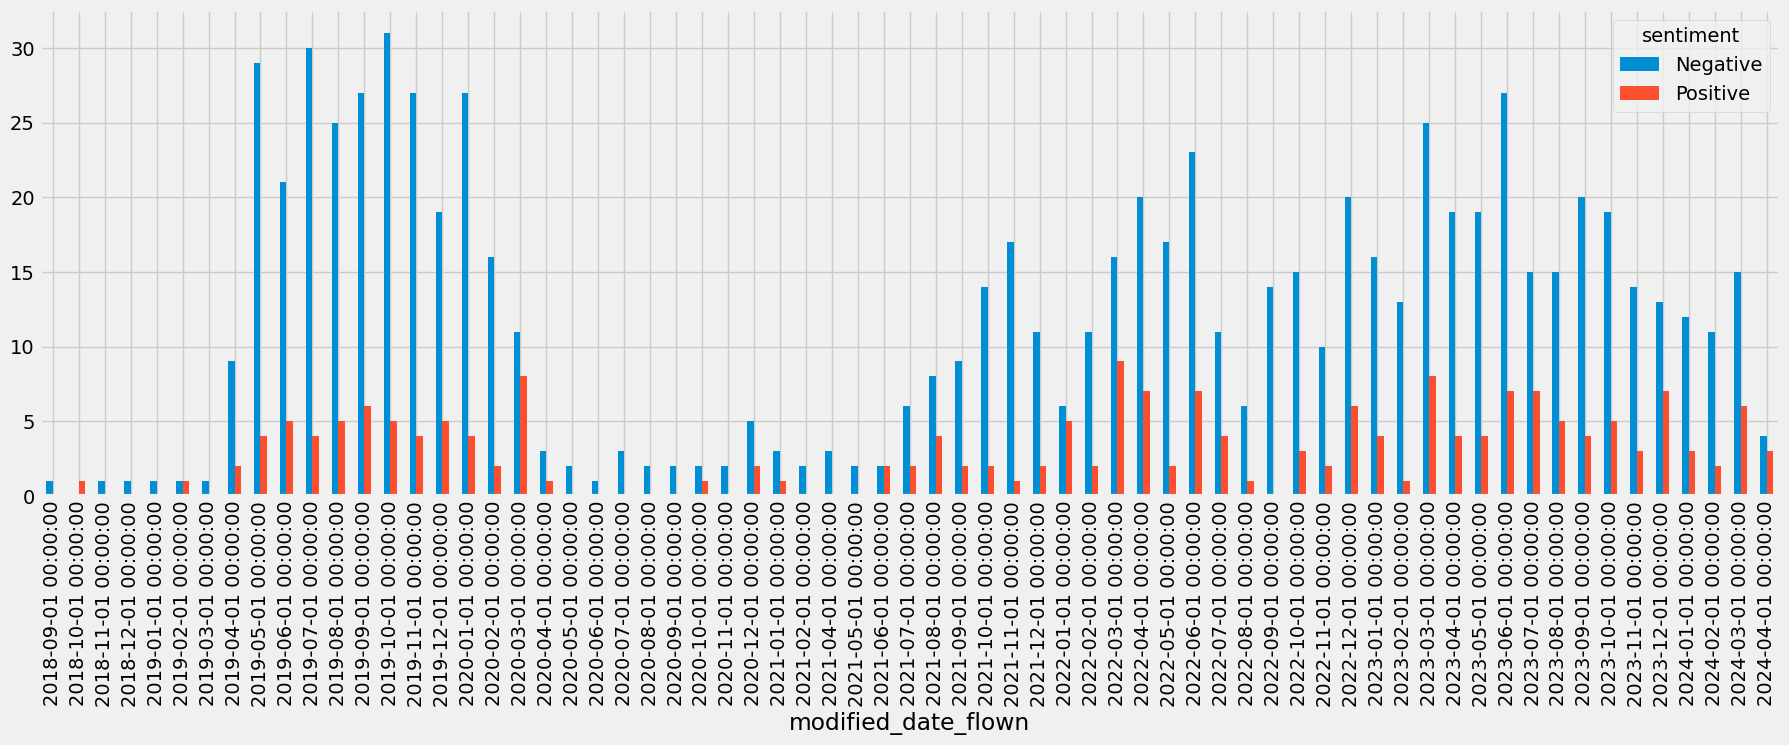

In [219]:
pd.crosstab(df.modified_date_flown,df.sentiment).plot(kind = "bar",figsize=(20,6))

<Axes: xlabel='year_flown'>

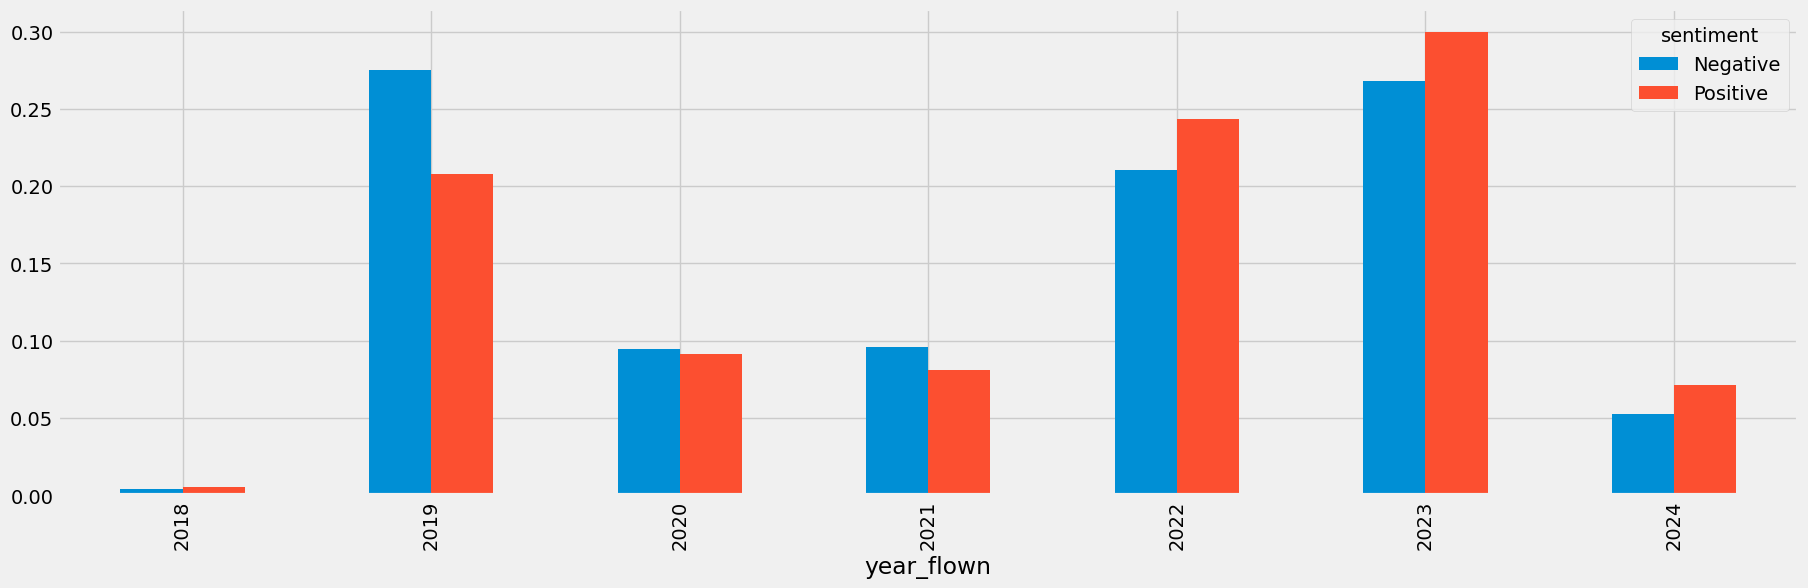

In [220]:
pd.crosstab(df.year_flown,df.sentiment,normalize ='columns' ).plot(kind = "bar",figsize=(20,6))

<Axes: xlabel='month_flown'>

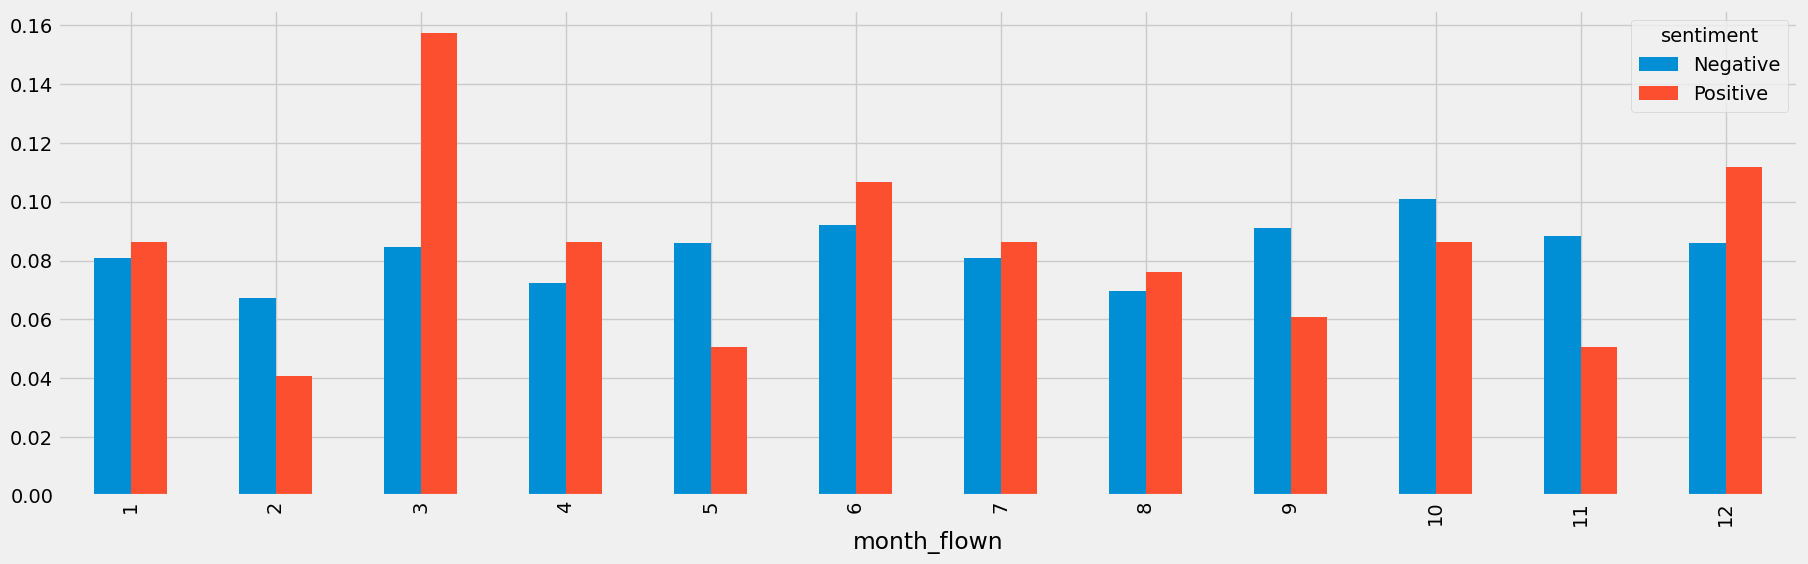

In [221]:
pd.crosstab(df.month_flown,df.sentiment,normalize ='columns').plot(kind = "bar",figsize=(20,6))

<Axes: xlabel='seat_type'>

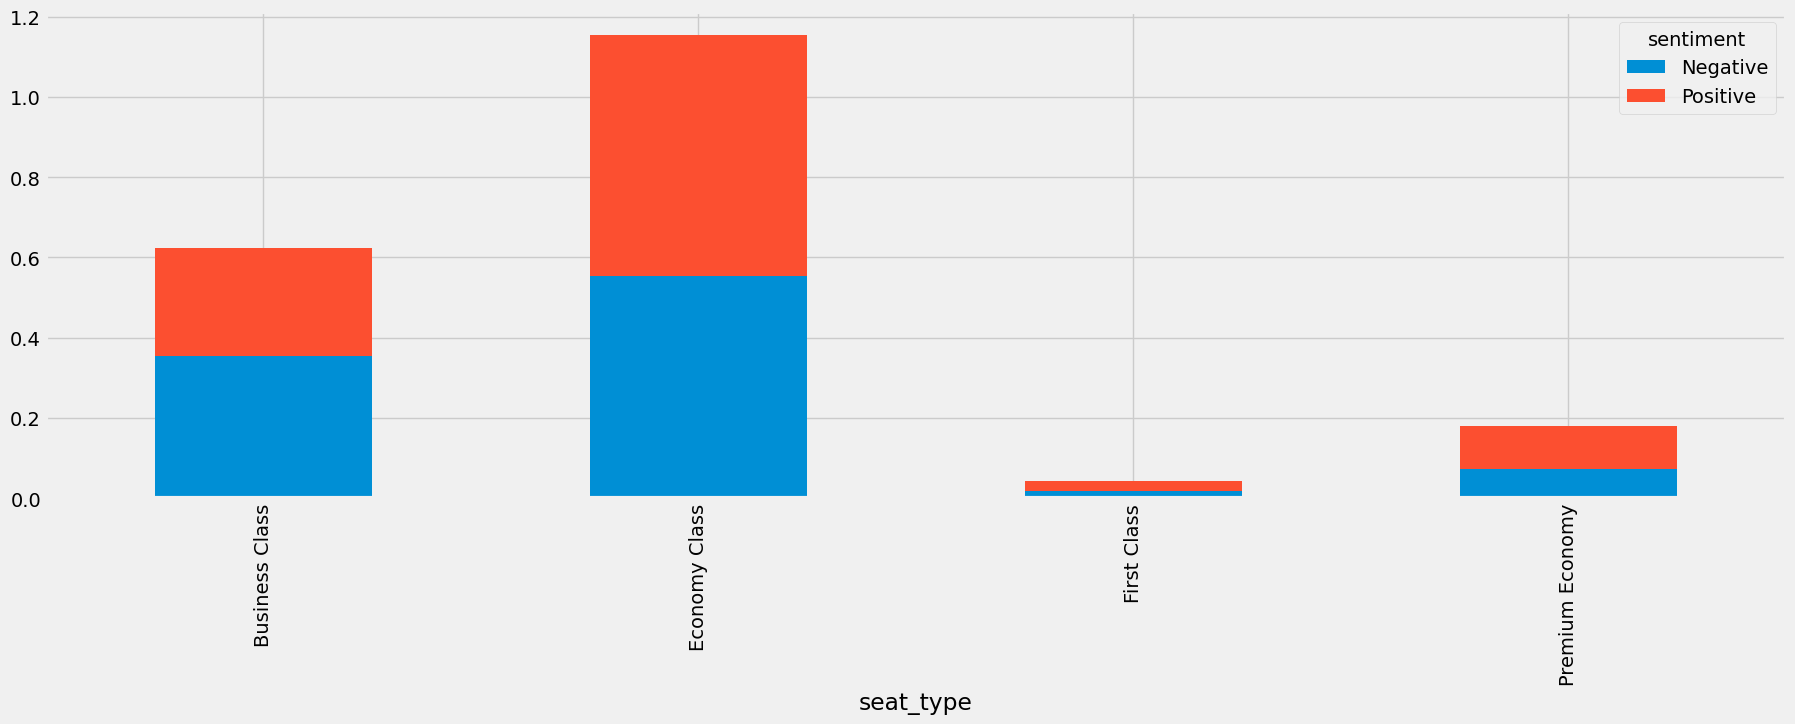

In [222]:
pd.crosstab(df.seat_type,df.sentiment,normalize ='columns').plot(kind = "bar",stacked=2,figsize=(20,6))

**USING VADER LIB FOR SENTIMENT ANALYSIS**

In [223]:
from nltk.sentiment import vader
from copy import deepcopy

In [224]:
vader_df = deepcopy(df)

In [225]:
vader_df.head()

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01


In [226]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
vader_df['VADER_SENTIMENT'] = vader_df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
vader_df

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown,VADER_SENTIMENT
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01,-0.9381
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01,-0.0754
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01,-0.4401
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01,-0.9394
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01,-0.9777
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Not Verified | \r\nMiami to London Heathrow w...,None,April 2019,Couple Leisure,Miami to London Heathrow,Business Class,Food & Beverages,Negative,4,2019,2019-04-01,0.9485
996,✅ Trip Verified | Houston to London. The plan...,None,April 2019,Solo Leisure,Houston to London Heathrow,Economy Class,Food & Beverages,Negative,4,2019,2019-04-01,-0.6652
997,✅ Trip Verified | London to Delhi. The worst ...,None,April 2019,Business,London to Delhi,Business Class,None,Negative,4,2019,2019-04-01,-0.9732
998,✅ Trip Verified | Bucharest to London. My fli...,None,April 2019,Business,Bucharest to London,Economy Class,None,Positive,4,2019,2019-04-01,-0.8830


In [227]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
vader_df['VADER_SENTIMENT_TYPE'] = vader_df['VADER_SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
vader_df

,reviews,aircraft,date_flown,traveller_type,route,seat_type,context,sentiment,month_flown,year_flown,modified_date_flown,VADER_SENTIMENT,VADER_SENTIMENT_TYPE
0,✅ Trip Verified | I flew with British Airway...,None,April 2024,Solo Leisure,London to Hannover,Economy Class,Luggage handling,Negative,4,2024,2024-04-01,-0.9381,negative
1,✅ Trip Verified | Manchester to Copenhagen vi...,A319 / A320,April 2024,Solo Leisure,Manchester to Copenhagen via London,Economy Class,Luggage handling,Positive,4,2024,2024-04-01,-0.0754,negative
2,✅ Trip Verified | I have never seen such disr...,None,April 2024,Solo Leisure,London to Valencia,Economy Class,None,Negative,4,2024,2024-04-01,-0.4401,negative
3,✅ Trip Verified | Paid for a 14 hour long fli...,A380,April 2024,Business,Singapore to London,Economy Class,None,Negative,4,2024,2024-04-01,-0.9394,negative
4,✅ Trip Verified | Very inconsiderate PA annou...,A320,April 2024,Business,Madrid to London Heathrow,Economy Class,Staff,Positive,4,2024,2024-04-01,-0.9777,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Not Verified | \r\nMiami to London Heathrow w...,None,April 2019,Couple Leisure,Miami to London Heathrow,Business Class,Food & Beverages,Negative,4,2019,2019-04-01,0.9485,positive
996,✅ Trip Verified | Houston to London. The plan...,None,April 2019,Solo Leisure,Houston to London Heathrow,Economy Class,Food & Beverages,Negative,4,2019,2019-04-01,-0.6652,negative
997,✅ Trip Verified | London to Delhi. The worst ...,None,April 2019,Business,London to Delhi,Business Class,None,Negative,4,2019,2019-04-01,-0.9732,negative
998,✅ Trip Verified | Bucharest to London. My fli...,None,April 2019,Business,Bucharest to London,Economy Class,None,Positive,4,2019,2019-04-01,-0.8830,negative


In [228]:
vader_df.to_csv('final_vader_ba_reviews.csv')

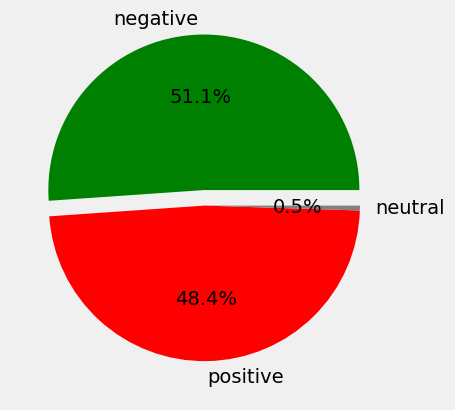

In [229]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = vader_df['VADER_SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

<Axes: xlabel='year_flown'>

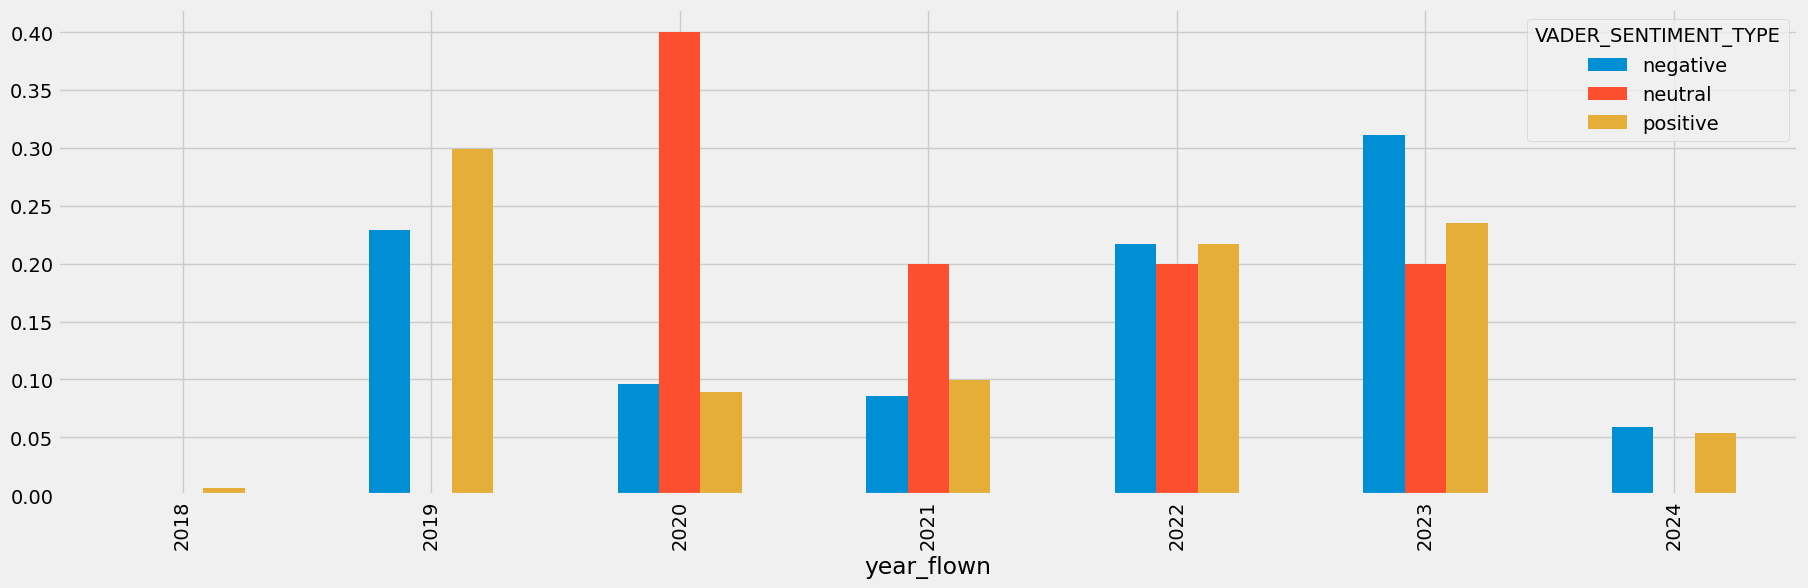

In [230]:
pd.crosstab(vader_df.year_flown,vader_df.VADER_SENTIMENT_TYPE,normalize ='columns' ).plot(kind = "bar",figsize=(20,6))

<Axes: title={'center': 'most discussed topic'}>

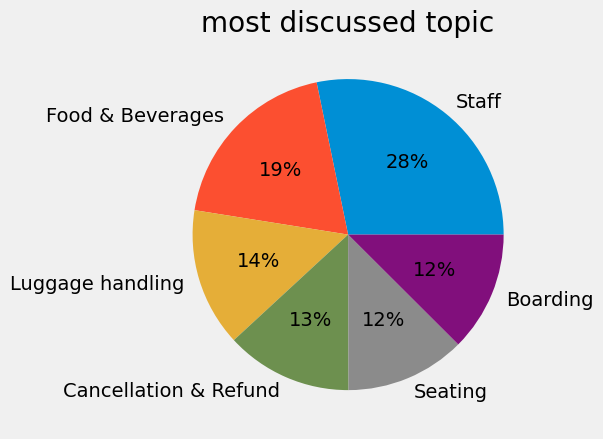

In [241]:
vader_df.context.value_counts().plot(kind='pie',autopct='%1.0f%%',title='most discussed topic',ylabel = '')

<Axes: title={'center': 'Cancellation & Refund reviews'}>

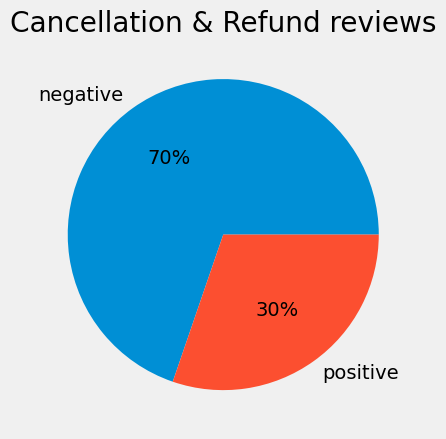

In [232]:
vdf2=vader_df[vader_df.context == 'Cancellation & Refund']
vdf2.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Cancellation & Refund reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Staff reviews'}>

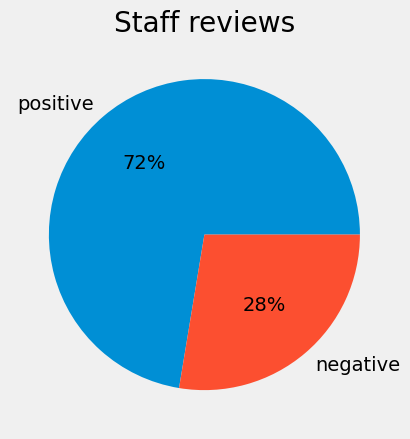

In [233]:
vdf3=vader_df[vader_df.context == 'Staff']
vdf3.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Staff reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Boarding reviews'}>

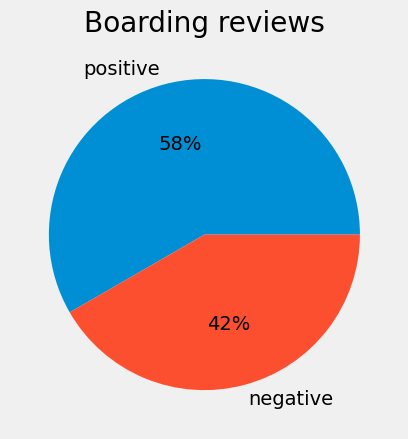

In [234]:
vdf4=vader_df[vader_df.context == 'Boarding']
vdf4.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Boarding reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Seating reviews'}>

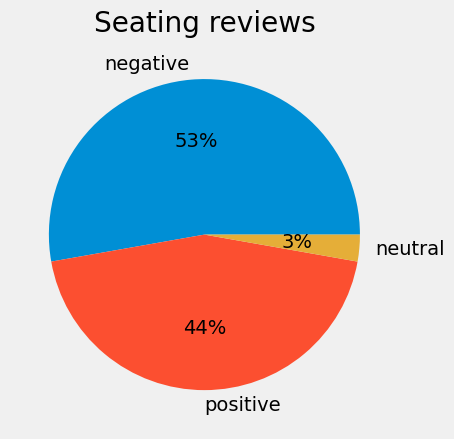

In [235]:
vdf5=vader_df[vader_df.context == 'Seating']
vdf5.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Seating reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Food & Beverages reviews'}>

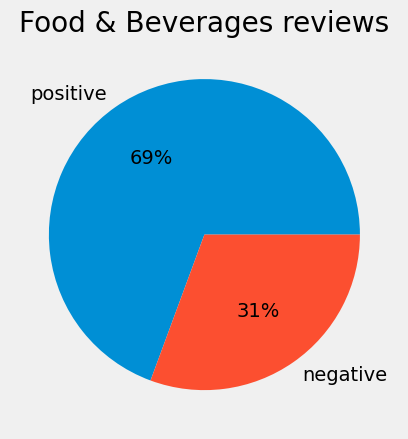

In [236]:
vdf6=vader_df[vader_df.context == 'Food & Beverages']
vdf6.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Food & Beverages reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Luggage handling reviews'}>

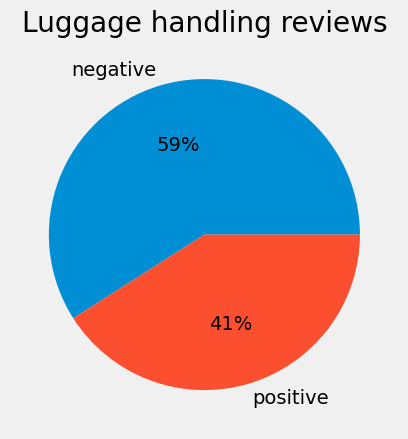

In [240]:
vdf7=vader_df[vader_df.context == 'Luggage handling']
vdf7.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Luggage handling reviews',autopct='%1.0f%%',ylabel = '')


<Axes: title={'center': 'Flight delays reviews'}>

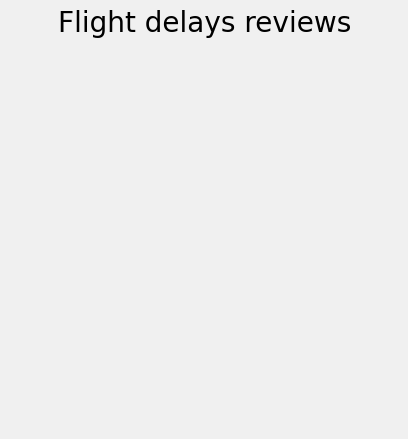

In [238]:
vdf8=vader_df[vader_df.context == 'Flight delays']
vdf8.VADER_SENTIMENT_TYPE.value_counts().plot(kind='pie',title='Flight delays reviews',autopct='%1.0f%%',ylabel = '')


**Using Vader library for Sentiment analysis gave more realistic results than using BERT**